In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## get 2007 data

In [4]:
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


## get 10 most populous countries

In [12]:
top_10 = data_2007.sort_values('population', ascending=False).head(10)
top_10

,country,continent,year,lifeExpectancy,population,gdpPerCapita
299,China,Asia,2007,72.961,1318683096,4959.114854
707,India,Asia,2007,64.698,1110396331,2452.210407
1619,United States,Americas,2007,78.242,301139947,42951.653090
719,Indonesia,Asia,2007,70.650,223547000,3540.651564
179,Brazil,Americas,2007,72.390,190010647,9065.800825
1175,Pakistan,Asia,2007,65.483,169270617,2605.947580
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
1139,Nigeria,Africa,2007,46.859,135031164,2013.977305
803,Japan,Asia,2007,82.603,127467972,31656.068060
995,Mexico,Americas,2007,76.195,108700891,11977.574960


## get GDP in billions for top 10 populous countries

In [29]:
top10_gdp_billions_2007 = (top_10.gdpPerCapita*top_10.population) / 10**9
top10_gdp_billions_2007.head()

299      6539.500929
707      2722.925439
1619    12934.458535
719       791.502035
179      1722.598680
dtype: float64

## create bar chart

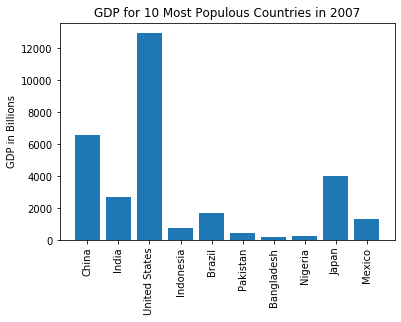

In [31]:
x = range(10)
plt.bar(x,top10_gdp_billions_2007)
plt.xticks(x,top_10.country, rotation = 'vertical')
plt.title('GDP for 10 Most Populous Countries in 2007')
plt.ylabel('GDP in Billions')
plt.show()

## subplot with GDP and Population

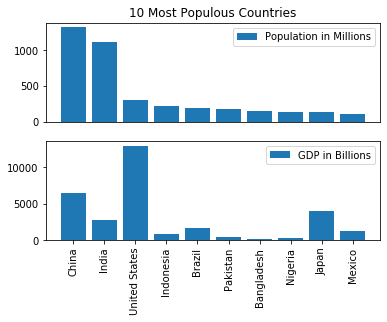

In [42]:
plt.subplot(2,1,1)
x = range(10)
plt.bar(x,top_10.population / 10**6)
plt.xticks([],[])
plt.title('10 Most Populous Countries')
plt.legend(['Population in Millions'])

plt.subplot(2,1,2)
plt.bar(x,top10_gdp_billions_2007)
plt.xticks(x,top_10.country, rotation = 'vertical')
plt.legend(['GDP in Billions'])
plt.show()

## Alternative Solution

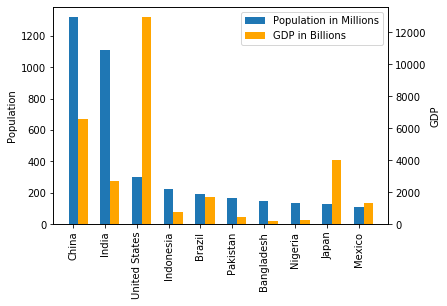

In [45]:
import numpy as np # We're going to import np for np.arange().
# np.arange(10) is similar to range(10), and it allows us to shift
# each value in it by the bar width as you can see below.
x = np.arange(10)

# We need to create subplots in order to overlay two bar plots
# with proper axes on the left hand side and the right hand side.
fig, ax1 = plt.subplots()

width = 0.3 # This is the width of each bar in the bar plot.
plt.xticks(x, top_10.country, rotation='vertical')
population = ax1.bar(x, top_10.population / 10**6, width)
plt.ylabel('Population')

# ax1.twinx() gives us the same x-axis with the y-axis on the right.
ax2 = ax1.twinx()
gdp = ax2.bar(x + width, top_10.gdpPerCapita * top_10.population / 10**9,
              width, color='orange')
plt.ylabel('GDP')
plt.legend([population, gdp],
           ['Population in Millions', 'GDP in Billions'])
figure = plt.gcf() # get current figure
plt.show()